In [2]:
%matplotlib inline
from proj1_helpers import *
import pandas as pd

In [3]:
yb, input_data, ids, features = load_csv_data('all/train.csv')

In [6]:
def remove_undefined_features(input_data, features, threshold):
    """ Removes features with an undefined ratio below threshold """
    N = input_data.shape[0]
    
    undefined_ratio = []
    for i, feature_name in enumerate(features):
        feature_column = input_data[:,i]
        defined_indices = (feature_column == -999)
        undefined_ratio.append(defined_indices.sum() / N)
        
    clean_feature_indices = (np.array(undefined_ratio) > threshold)
    new_features = features[clean_feature_indices]
    new_data = input_data[:,clean_feature_indices]
    
    return new_features, new_data

In [10]:
def remove_undefined_samples(labels, input_data):
    """ Removes samples with undefined features """
    clean_data_indices = np.all(input_data != -999,axis = 1)
    new_labels = labels[clean_data_indices]
    new_data = input_data[clean_data_indices]
    
    return new_labels, new_data

In [7]:
new_features, new_data = remove_undefined_features(input_data,features,0.7)

In [12]:
new_labels, _ = remove_undefined_samples(yb,new_data)

In [11]:
print((yb == 1).sum()/yb.size)

0.342668


In [14]:
new_labels.size

72543

In [13]:
print((new_labels == 1).sum()/new_labels.size)

0.4475276732420771


In [34]:
100*(clean_data.shape[0]/250000)

55.2384

In [29]:
test = np.array([np.array([0,1,2,3]),np.array([4,5,6,7]), np.array([4,5,6,0])])

In [30]:
np.all(test != 0, axis = 1)

array([False,  True, False])

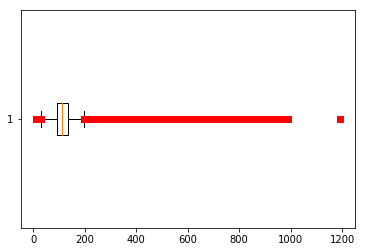

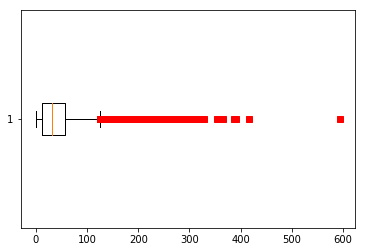

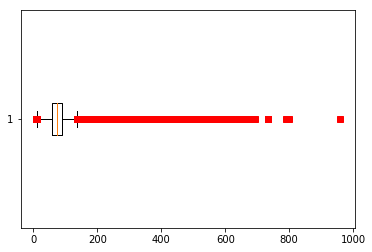

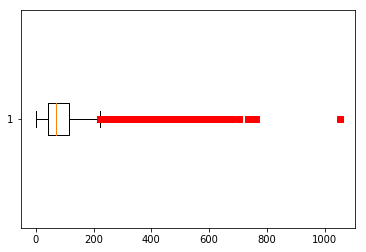

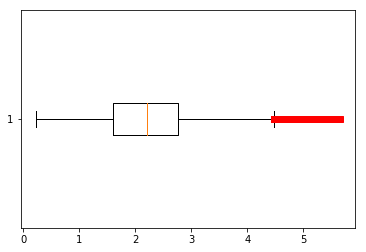

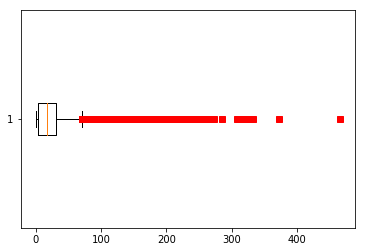

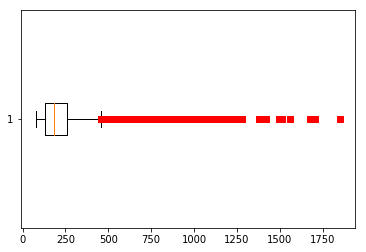

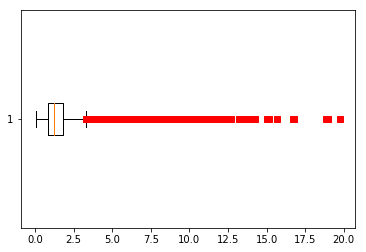

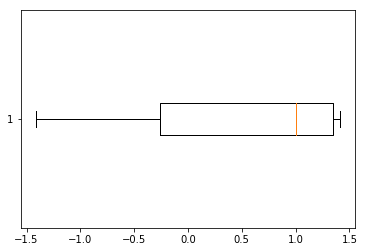

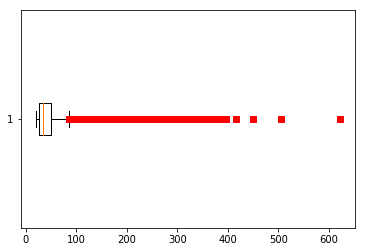

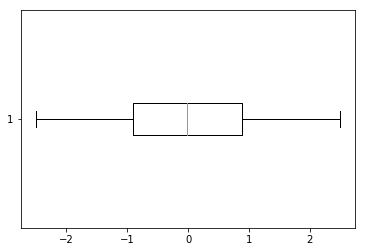

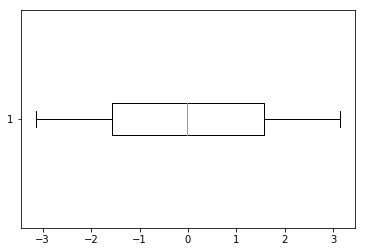

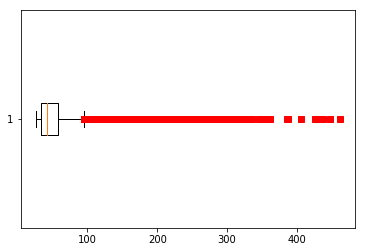

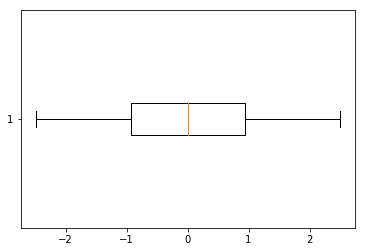

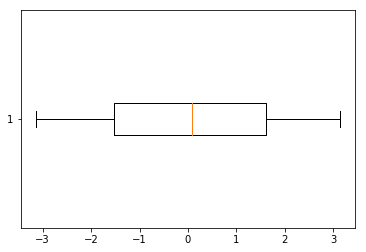

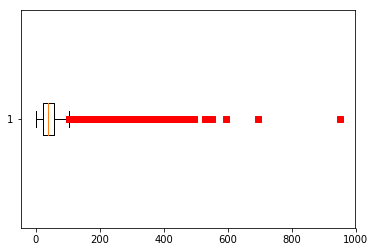

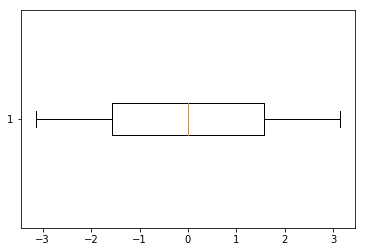

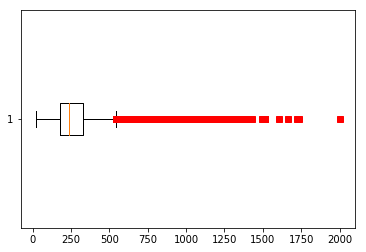

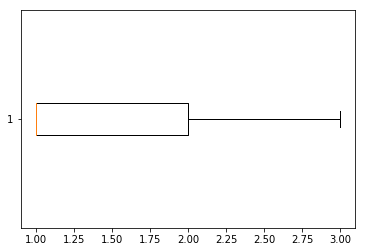

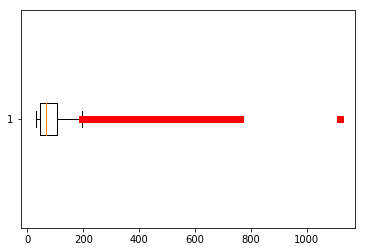

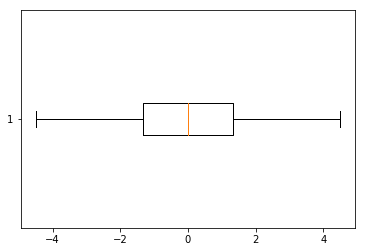

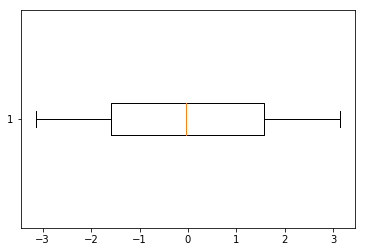

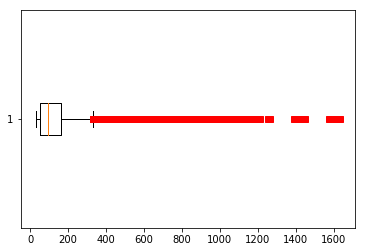

In [37]:
import matplotlib.pyplot as plt

for i, feature_name in enumerate(features[clean_features]):
    # horizontal boxes
    plt.figure()
    plt.boxplot(clean_data[:,i], 0, 'rs', 0)

    #plt.scatter(cleaned_feature, cleaned_data)
    #plt.xlabel(feature_name)
    #plt.ylabel('yb')
    #plt.savefig(f'{feature_name}_boxplot.png')
    plt.show()

In [38]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [42]:
(is_outlier(clean_data).sum() / clean_data.size)*100

0.09297250054152625

In [47]:
np.savetxt("cleaned_data_correlation.csv",np.corrcoef(clean_data.T),delimiter=',')

In [110]:
with open('outliers_pct.txt', 'w') as fp:
    for i, fname in enumerate(list(df)):
        r = input_data[:,i]
        print(fname, len(r[r == -999]) / float(5682.38), '%', file=fp)

In [50]:
for feature in features[clean_features]:
    print(feature)

DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_all_pt
